

# Project:  Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  For this project I choosed TMDb movie dataset, it contains information about 10 thousand movies.
<br> I was pose a number of questions that can be answered from this collection of data like: The popularity of movies based on the years<br>,Which genres have the most popular,Which years get the highest budget movies,Which movies have higher voting numbers,The most productive genres movies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
# check null vaule
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### specific Data Cleaning :

After reading the data, displaying and understanding its details, we can now define the columns we need and clean up the remaining data

In [7]:
# drop all columns doesn't need it 
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','release_date','cast','production_companies','director','vote_count','budget_adj','revenue_adj'], axis=1 , inplace=True)

In [8]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,7.3,2015


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_average    10866 non-null  float64
 7   release_year    10866 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 679.2+ KB


In [10]:
# drop null valus
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   budget          10843 non-null  int64  
 2   revenue         10843 non-null  int64  
 3   original_title  10843 non-null  object 
 4   runtime         10843 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_average    10843 non-null  float64
 7   release_year    10843 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 762.4+ KB


In [11]:
#check if we have any duplicate values
sum(df.duplicated())

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
sum(df.duplicated())

0

In [14]:
# split value and use first string it have 
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [15]:
df['budget']

0        150000000
1        150000000
2        110000000
3        200000000
4        190000000
           ...    
10861            0
10862            0
10863            0
10864            0
10865        19000
Name: budget, Length: 10842, dtype: int64

In [16]:
# Check for 0 values and fill it with an mean 
mean = df['budget'].mean()
df['budget']= df.budget.replace(0,mean)


In [17]:
df['budget']

0        1.500000e+08
1        1.500000e+08
2        1.100000e+08
3        2.000000e+08
4        1.900000e+08
             ...     
10861    1.465531e+07
10862    1.465531e+07
10863    1.465531e+07
10864    1.465531e+07
10865    1.900000e+04
Name: budget, Length: 10842, dtype: float64

In [18]:
df.head(100)

,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
0,32.985763,1.500000e+08,1513528810,Jurassic World,124,Action,6.5,2015
1,28.419936,1.500000e+08,378436354,Mad Max: Fury Road,120,Action,7.1,2015
2,13.112507,1.100000e+08,295238201,Insurgent,119,Adventure,6.3,2015
3,11.173104,2.000000e+08,2068178225,Star Wars: The Force Awakens,136,Action,7.5,2015
4,9.335014,1.900000e+08,1506249360,Furious 7,137,Action,7.3,2015
...,...,...,...,...,...,...,...,...
95,1.841779,1.465531e+07,233755553,Alvin and the Chipmunks: The Road Chip,92,Adventure,5.7,2015
96,1.823130,1.193000e+07,18340000,The Dressmaker,118,Drama,6.9,2015
97,1.758618,8.500000e+06,43528634,The DUFF,100,Romance,6.8,2015
98,1.742286,1.000000e+07,52882018,Sinister 2,97,Horror,5.5,2015


In [19]:
df.shape

(10842, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10842 non-null  float64
 1   budget          10842 non-null  float64
 2   revenue         10842 non-null  int64  
 3   original_title  10842 non-null  object 
 4   runtime         10842 non-null  int64  
 5   genres          10842 non-null  object 
 6   vote_average    10842 non-null  float64
 7   release_year    10842 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 762.3+ KB


After we have cleaned and revised the data ,we can posed a questions and answere through this dataframe

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (The popularity of movies based on the years)

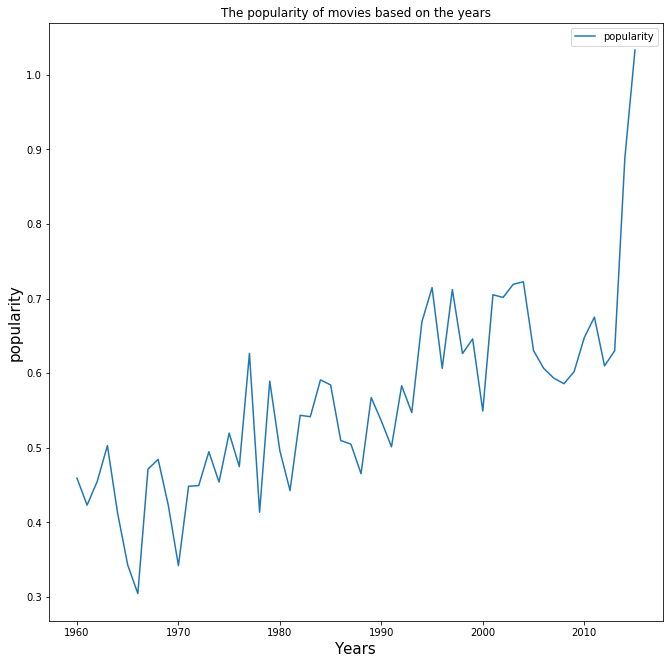

In [21]:

df_p= df.groupby(['release_year'], as_index = False)['popularity'].mean()
df_p.plot(x='release_year',y='popularity',figsize=(11,11))
plt.title('The popularity of movies based on the years')
plt.xlabel('Years',fontsize=15)
plt.ylabel('popularity',fontsize=15);

From the plot above, we can conclude that the popularity of movies in general is gradually increasing with the passing of years, and they have <br>increased significantly from 2010 onwards.

### Research Question 2  (Which genres have the most popular)

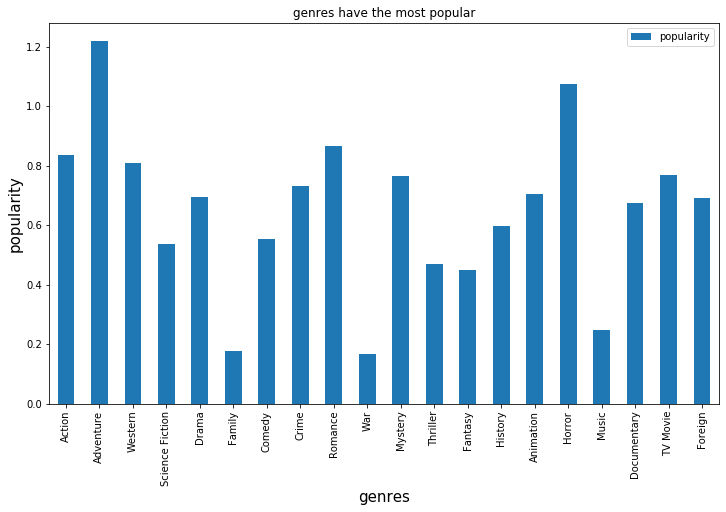

In [22]:
list = []
for x in df['genres']:
    if x not in list:
        list.append(x)
        
df_g= df.groupby(['genres'], as_index = False)['popularity'].mean().plot(kind='bar',title='genres have the most popular',figsize=(12,7))
plt.xlabel('genres',fontsize=15)
plt.ylabel('popularity',fontsize=15)
plt.xticks(np.arange(20), list[:20]);

through the plot we can see that the most popular genres are adventure ,horror ,romance and Action.

### Research Question 3  (Which years  get the highest budget movies)

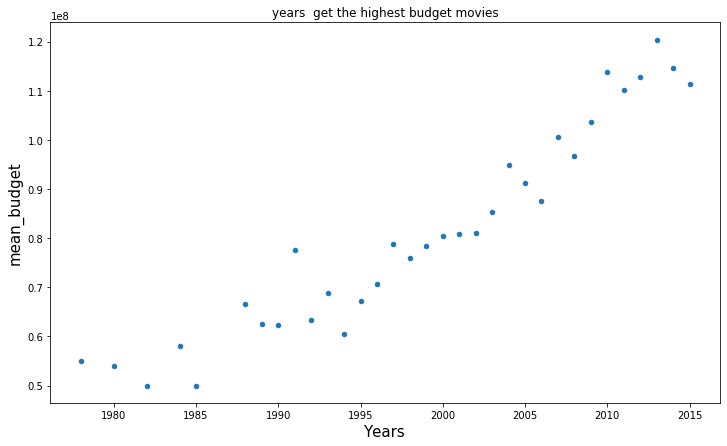

In [23]:
#select high 1000 movies budget
sort_b = df.sort_values(by=['budget'], ascending = False).head(1000)
sort_b= sort_b.groupby(['release_year'], as_index = False)['budget'].mean()
sort_b.plot(x='release_year',y='budget',figsize=(12,7),kind='scatter')
plt.title('years  get the highest budget movies')
plt.xlabel('Years',fontsize=15)
plt.ylabel('mean_budget',fontsize=15);

We notice that the budget for movies rises as the years pass ,and as we know the more investment the better the development possibilities. <br>This may be the explanation why in recent years movies have risen in popularity.

### Research Question 4  (which movies have higher voting numbers)

In [24]:
df_v = df.sort_values(by=['vote_average'], ascending = False).head(10)
df_v=df_v[['original_title', 'vote_average']]
df_v

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
2269,Life Cycles,8.8
1200,Black Mirror: White Christmas,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5
3690,The Art of Flight,8.5
8411,Queen - Rock Montreal,8.5


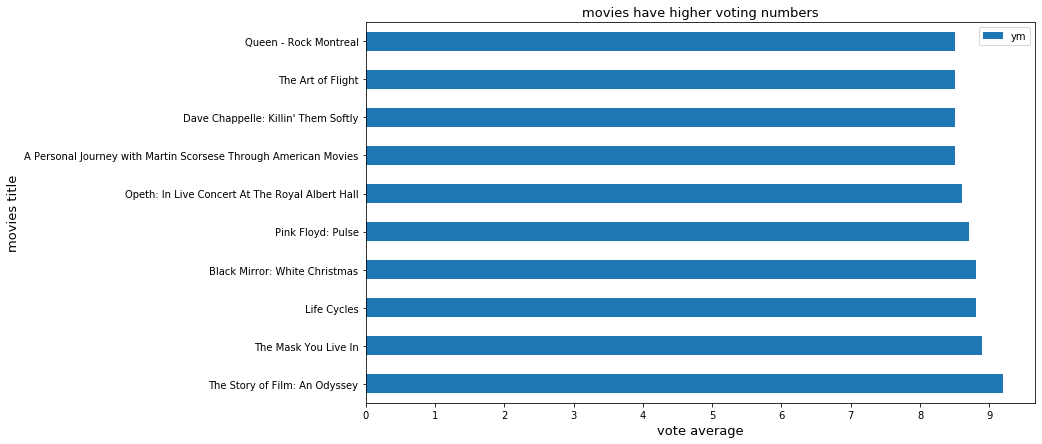

In [25]:

xm =df_v['original_title'][:10]
ym =df_v['vote_average'][:10]

dfm = pd.DataFrame({'xm': xm,'ym': ym})
ax = dfm.plot.barh(x='xm', y='ym', rot=0,figsize=(12,7))

s = pd.Series(xm, index=range(0,10))
plt.xticks(np.arange(len(s.index)), s.index)

plt.title('movies have higher voting numbers',fontsize=13)
plt.xlabel('vote average',fontsize=13)
plt.ylabel('movies title',fontsize=13);

plt.show()

According to the analysis above, the higher voting movies is : The Story of Film: An Odyssey, The Mask You Live In, Life Cycles, Black Mirror: White Christmas, Pink Floyd: Pulse, Opeth: In Live Concert At The Royal Albert Hall, A Personal Journey with Martin Scorsese Through American Movies,Dave Chappelle: Killin' Them Softly,The Art of Flight, Queen - Rock Montreal.

### Research Question 5  (The most productive genres movies)

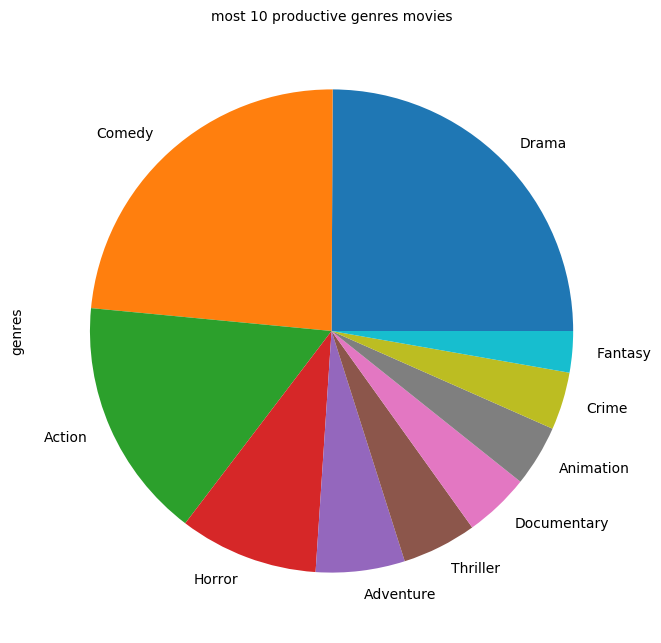

In [84]:
plt.figure(figsize=(8,8), dpi = 100)
plt.title('most 10 productive genres movies',fontsize=10)
df['genres'].value_counts().head(10).plot.pie();


From the plot above, we can see that production companies focused on producing drama, comedy, action and horror as the most productive genres.

<a id='conclusions'></a>
## Conclusions

>Finally, through through my analytic, we can say that with the passage of time have an increasing popularity of movies around the world, and that this may be due to budgets that grow up over the years and behave in the production of the amazing movies.
<br>The most popular genres movies around the world are Adventure and Horror.There are also movies that have gained great popularity and a very high rating, such as The Story of Film: An Odyssey and The Mask You Live In.analysis ,Also the production companies  have concentrated on the romantic, cartoon, action and horror genres as most productive movies
<br><br>**Limitations:** This analysis was performed by looking at the data set containing approximately 10,000 films. Moreover, we are not sure whether the data provided is completely correct and up to date, as there were missing values ​​in the "Budget" column.
During the cleaning process, I replaced the missing values ​​with the average, but it still can distort the result, and there are also many columns in the dataset I had to remove for the same reason.
Also, I notice that the value of "popularity appears ambiguous to something, we don't know how it was calculated or based on what?